<H1 style="text-align: center">ECMM422 - Machine Learning</H1>
<H2 style="text-align: center">Assignment 3: Large Margin Classifiers</H2>

| Date set     | Hand-in date |
|:------------------|:-----------------------------------|
| 21st February 2020  | **  Wednesday 4th March ** |


This workshop is worth 25% of the total module mark.




Your report should consist of your IPython notebook showing what you did, what was the
result, and what you can conclude from the exercise. Each report will be
assessed on the following criteria:

* Does it record what was done in the exercise?
* Does it permit the results to be reproduced?
* How does the work relate to the theoretical foundations discussed in lectures?
* Is it well presented?

### Submitting the notebooks

Note that an electronic submission is required.  You should also submit the notebook electronically at [electronic hand-in system]( http://empslocal.ex.ac.uk/submit/).  You just need to submit the single .ipynb file that is the notebook, so you should be able to upload it directly from the directory where you have saved it on a University machine or your laptop.  If you're not sure where in your homespace it is, type <code>pwd</code> (print working directory) in a cell to find out where the notebooks are.

<b>Note: you must also submit your cover sheet and E-Submit receipt via BART to complete the submission.</b>


<div class="alert alert-info">
Although you will undoubtedly work collaboratively in the workshops themselves, these are *individual* exercises.  The reports you write should be about the results *you* obtained, and your attention is drawn to the College and University guidelines on collaboration and plagiarism. 
</div>


# Large margin classifiers and support vector machines

The aim of this workshop is to write and test code for a nonlinear support vector machine.  It builds on and repeats some of the last workshop and is done in stages:

1. You will do a couple of exercises to familiarise yourself with constrained optimisation and the Lagrangian dual formulation.
1. Initially, you will write a linear large margin classifier for linearly separable data.
1. The next stage is to modify this code, which uses a *hard margin* to a soft margin.
1.  Finally, you will use the *kernel trick* to map the data to a high-dimensional feature space, while calculating the necessary inner-products in the original data space.

At each stage, you should test your code on the provided data.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Part 1. Constrained optimisation with equality constraints

To begin with we will solve an optimisation problem with equality constraints.  The problem is defined for a two-dimensional $\mathbf{x} = (x_1, x_2)^T$ as follows:
\begin{align*}
    \mbox{min}_\mathbf{x} ~~ f(\mathbf{x}) &= x_1^2+ 3x_2^2\\
    \text{such that}\qquad & x_1 + x_2 = 1
\end{align*}

In this part, you will be asked to solve the problem "by hand", using markdown cells to explain your steps. 

To see what is going on, make a contour plot of $f(\mathbf{x})$ and draw the contraint line on it.  The following code will draw the contour.  You should add the constraint line. 

You should be able to approximately read the value and location of the contrained minimum from your plot.

(-1.0, 2.0, -1.0, 2.0)

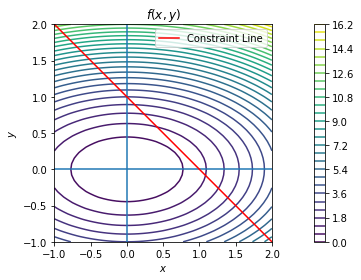

In [2]:
def f(x, y):
    """Evaluate the unconstrained objective function"""
    return x*x + 3*y*y

def h(x, y):
    return x + y - 1

x = np.linspace(-1, 2, 50)
y = np.linspace(-1, 2, 40)
X, Y = np.meshgrid(x, y)
F = f(X, Y)
H = h(X, Y)
plt.axhline(0.0)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'$f(x,y)$')
plt.axvline(0.0)
#plt.pcolor(X, Y, F, cmap='gray', alpha=0.3)
plt.contour(X, Y, F, 30)
plt.plot(X[H==0], Y[H==0], color = "red",label = "Constraint Line")
plt.legend()
plt.colorbar()
plt.axis('scaled')

<b>1.1)</b>
Write the constraint in standard form $h(\mathbf{x}) = 0$ and therefore write down the Lagrangian, $L(\mathbf{x}, \nu)$.  You could do this and the following cells on a piece of paper, but it's not too hard to put it into LaTeX for posterity.
<div style="text-align: right"><b>[4 marks]</b></div>

Taking the constraint above and rearranging for $h(\mathbf{x}) = 0$:
\begin{align*}
        \text{constraint is: }x_1 + x_2 = 1 \\
        \therefore x_1 + x_2 - 1 = 0 = h(\mathbf{x})
        \\ \\
        L(\mathbf{x}, \nu) = f(\mathbf{x}) + \nu \cdot h(\mathbf{x}) \\
        \therefore L(\mathbf{x}, \nu) = x_1^2 + 3x_2^2 + \nu \times ( x_1 + x_2 - 1 )
\end{align*}

<b>1.2)</b>
First, minimise the unconstrained minimisation problem by minimising $L(\mathbf{x}, \nu)$ with respect to $\mathbf{x}$ and $\nu$.  This is done by setting the partial derivatives with respect to $x_1$, $x_2$ and $\nu$ to zero and solving for $x_1$, $x_2$ and $\nu$.
<div style="text-align: right"><b>[5 marks]</b></div>


\begin{align*}
    \frac{\partial L(\mathbf{x},\nu)}{\partial \nu} &= x_1 + x_2 - 1  \\
    \frac{\partial L(\mathbf{x},\nu)}{\partial x_1} &= 2 \cdot x_1 + \nu \\
    \frac{\partial L(\mathbf{x},\nu)}{\partial x_2} &= 6 \cdot x_2 + \nu \\ \\ \\
    \text{Finding minimum when  } \frac{\partial L(\mathbf{x},\nu)}{\partial \nu}, \frac{\partial L(\mathbf{x},\nu)}{\partial x_1}, \frac{\partial L(\mathbf{x},\nu)}{\partial x_2} &= 0
    \\ \\ \\
    \text{taking } \frac{\partial L(\mathbf{x},\nu)}{\partial x_1} = \frac{\partial L(\mathbf{x},\nu)}{\partial x_2}&,\\
    \therefore 2 \cdot x_1 + \nu &= 6 \cdot x_2 + \nu \\
    \therefore 2 \cdot x_1 &= 6 \cdot x_2 \\
    \therefore 4 \cdot x_2 &= 1  \\
    \therefore x_2 &= \frac{1}{4} \\ \\
    \therefore \because x_1 &= 3 \cdot x_2, \\
    x_1 &= \frac{3}{4} \\
    \\
    \nu &= -2 \cdot x_1 \\
    \therefore \nu &= \frac{-3}{2}
\end{align*}

<b>1.3)</b> 
Plot the minimising point on your contour plot and verify that agrees with  the constraint and the function value at the constrained minimum.
<div style="text-align: right"><b>[2 marks]</b></div>

(-1.0, 2.0, -1.0, 2.0)

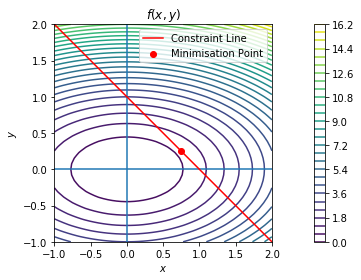

In [4]:
x = np.linspace(-1, 2, 50)
y = np.linspace(-1, 2, 40)
X, Y = np.meshgrid(x, y)
F = f(X, Y)
H = h(X, Y)
plt.axhline(0.0)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'$f(x,y)$')
plt.axvline(0.0)
#plt.pcolor(X, Y, F, cmap='gray', alpha=0.3)
plt.contour(X, Y, F, 30)
plt.colorbar()
plt.plot(X[H==0], Y[H==0], color = "red", label = "Constraint Line")
plt.scatter([0.75], [0.25], color = "red", label = "Minimisation Point") # From 1.2
plt.legend()
plt.axis('scaled')

<b>1.4)</b>
Now we will solve the problem again, but this time by finding the Lagrangian dual function, which we will maximise to find the optimal dual variable $\nu$ and thus the optimal $\mathbf{x}$.

By setting the derivative of the Largrangian with respect to $\mathbf{x}$ to zero, find the Largrangian dual function $g(\nu)$. 
<div style="text-align: right"><b>[5 marks]</b></div>

For Lagrangian dual function, instead of $h(\mathbf{x}) = 0$ we have $f_i(\mathbf{x}) \leq 0,     \forall i \in 1, ... , m$. 

In this case, $f_0(\mathbf{x}) = x_1^2+ 3x_2^2$ and $h_1(\mathbf{x}) = x_1 + x_2 - 1$, with no other functions.

From the definition:

$g(\lambda, \nu) = \min\limits_{\mathbf{x}} \bigg[ f_0(\mathbf{x}) + \sum\limits_{i=1}^{m} \lambda_{i} f_{i}(\mathbf{x}) + \sum\limits_{j=1}^{p} \nu_{j} h_{j}(\mathbf{x})  \bigg] $

$\therefore g(\lambda, \nu) = \min\limits_{\mathbf{x}} \bigg[ x_1^2+ 3x_2^2 + \nu_1 ( x_1 + x_2 - 1 ) \bigg] = g(\nu_1)$

Where $L(\mathbf{x},\nu_1) = x_1^2+ 3x_2^2 + \nu_1 ( x_1 + x_2 - 1 )$ The next step is to find the derivative with respect to $\mathbf{x}$.

$\frac{\partial L(\mathbf{x},\nu)}{\partial x_1} = 2 \cdot x_1 + \nu$

$\frac{\partial L(\mathbf{x},\nu)}{\partial x_2} = 6 \cdot x_2 + \nu$

$\therefore x_1 = \frac{-1}{2}\nu, x_2 = \frac{-1}{6} \nu$

$\therefore g(\nu) =  \frac{\nu^2}{4} + \frac{\nu^2}{12} + \nu ( \frac{-\nu}{2} + \frac{-\nu}{6}- 1 ) $

$g(\nu) =  \frac{\nu^2}{3} - \frac{\nu^2}{2} - \frac{\nu^2}{6} - \nu  $

$g(\nu) =  - \nu - \frac{\nu^2}{3} $


<b>1.5)</b>
Maximise $g(\nu)$ with respect to $\nu$ and so find the optimal dual variable $\nu^\star$ and thus $g(\nu^\star)$.
<div style="text-align: right"><b>[5 marks]</b></div>

Maximum $\nu^*$ is at $\frac{\partial g(\nu)}{\partial \nu} = 0$

$\frac{\partial g(\nu)}{\partial \nu} = -1 - \frac{2\nu}{3} = 0$

$\therefore \nu^* = \frac{-3}{2}$

$\therefore g(\nu^{*}) = \frac{3}{4}$



<b>1.6)</b>
Use the relations you derived when finding the Lagrangian dual function to get $\mathbf{x}^\star$ from $\nu^\star$.  Thus find $f(\mathbf{x}^\star)$ and verify that it equals $g(\nu^\star)$.

<div style="text-align: right"><b>[4 marks]</b></div>

Finding $\mathbf{x^*}$, as $x_1 = \frac{-1}{2}\nu$, $x_2 = \frac{-1}{6} \nu$, we can find that $x_1^* = \frac{3}{4}$, and $x_2^* = \frac{1}{4}$

$\therefore f(\mathbf{x}^*) = \frac{3}{4}$, same as $g(\nu^*)$ as expected

## Part 2. Quadratic programming

At the heart of the dual formulation of the large margin classifier (LMC) is the quadratic programme with constraints.  For example, for the hard LMC the dual Lagrange function to be *maximised* is:
\begin{align*}
          \newcommand{\balpha}{\mathbf{\alpha}}
          \newcommand{\bx}{\mathbf{x}}
        \max_{\balpha} & ~~ \sum_n \alpha_n - \frac{1}{2} \sum_{n,m}t_n t_m
                         \alpha_n\alpha_m \langle\bx_n, \bx_m\rangle\\
        \text{such that   }\quad & \alpha_n \ge 0, \quad \sum_n \alpha_n t_n = 0
\end{align*}
      
There are a number of quadratic progamming functions that you could use, but I recommend that you use those from [cvxopt](http://cvxopt.org/).  On the workshop machines you should be able to import the module with:

    import cvxopt
    
If you want to use `cvxopt` on your own machine then you can install it from a shell with `conda`

    conda install cvxopt

## `cvxopt` example

Here is an example of solving a constrained quadratic program (QP) with `cvxopt`. This is largely copied from https://courses.csail.mit.edu/6.867/wiki/images/a/a7/Qp-cvxopt.pdf

The standard form for a QP in `cvxopt` notation is:

\begin{align*}
        \min_{x}  \tfrac{1}{2} x^T P x &+ q^T x \\
        \text{such that   }\quad  Gx &\preceq h\\
        Ax & = b
\end{align*}
where $Gx \preceq h$ means that the inequality is taken element-wise for each row of $Gx$ and $h$.

In `cvxopt` the QP is defined by the parameters $P, q, G, h, A$ and $b$.  The matrix $P$ and the vector $q$ must be specified, but the others are optional.   Note that all optimisations must be manipulated to be of this form.  In particular, note that you will want to *maximise* the Lagrangian dual $g(\mathbf{\alpha})$, so you will have to write the maximisation as the minimisation of $-g(\mathbf{\alpha})$.

Here is a simple example:

\begin{align*}
        \min_{x}  \tfrac{1}{2} x^2 + & 3x + 4y\\
        \text{such that   }\quad x, y & \ge 0\\
        x + 3y & \ge 15\\
        2x + 5y & \le 100\\
        3x + 4y & \le 80
\end{align*}


Evaluate the objective function on a grid covering the range $[-5, 20] \times [-5, 20]$ and so plot contours of the objective function.  Augment your plot with lines showing the inequalities and so, by eye, find the minimum of the objective function. 

(If you want to be fancy -- not necessary -- you could use the [fillplots](https://github.com/tkf/fillplots) module to plot the region defined by the inequalities.

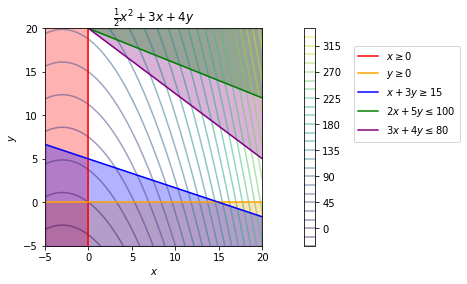

In [45]:
def f(x, y):
    return (x**2)/2 + 3*x + 4*y

def h1(x,y):
    return x + 3*y - 15

def h2(x,y):
    return 2*x + 5*y - 100

def h3(x,y):
    return 3*x + 4*y - 80

x = np.linspace(-5, 20, 201)
y = np.linspace(-5, 20, 201)
X, Y = np.meshgrid(x, y)

F = f(X, Y)
H1 = h1(X, Y)
H2 = h2(X, Y)
H3 = h3(X, Y)

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'$\frac{1}{2}x^2 + 3x + 4y$')
#plt.axvline(0.0)

#plt.pcolor(X, Y, F, cmap='gray', alpha=0.3)
plt.contour(X, Y, F, 30, alpha=0.5)


## FILL AREAS
plt.fill_between(x,0,-5,color='orange',alpha=0.3)
plt.fill_between([-5, 0],-5,20, color='r',alpha=0.3)
plt.fill_between(X[H1 == 0], Y[H1 == 0], -5, color= 'blue', alpha = 0.3)
plt.fill_between(X[H3 == 0], Y[H3 == 0], 20, color= 'purple', alpha = 0.3)
plt.fill_between(X[H2 == 0], Y[H2 == 0], 20, color= 'green', alpha = 0.3)


## DRAW LINES
plt.axvline(0.0, c='r', label=r"$x \geq 0$")
plt.axhline(0.0, c='orange', label=r"$y \geq 0$")
plt.plot(X[H1 == 0], Y[H1 == 0], c = 'blue', label=r"$x + 3y \geq 15$")
plt.plot(X[H2 == 0], Y[H2 == 0], c = 'green', label=r"$2x + 5y \leq 100$")
plt.plot(X[H3 == 0], Y[H3 == 0], c = 'purple', label=r"$3x + 4y \leq 80$")


plt.colorbar()
plt.axis('scaled')
plt.legend(loc='center left', bbox_to_anchor=(1.40, 0.7))
plt.show()

By eye we can see that the minimum is at the point where the red line and blue line meet, where $x = 0$ and $x + 3y = 15$. This gives the values for $x$ and  $y$ to minimise the function as $x = 0$ and $y = 5$. This gives a minimum constrained value of $20$ for the equation $\frac{1}{2}x^2 + 3x + 4y$.

The problem can be written in standard form as:

\begin{align*}
  \min_{x, y} \tfrac{1}{2}
  \begin{bmatrix}
    x \\ y
  \end{bmatrix}^T
  \begin{bmatrix}
    1 & 0\\
    0 & 0
  \end{bmatrix}
  \begin{bmatrix}
    x \\ y
  \end{bmatrix}
  +
   \begin{bmatrix}
    3 \\ 4
  \end{bmatrix}^T
 \begin{bmatrix}
    x \\ y
  \end{bmatrix}\\
  \begin{bmatrix}
    -1 & 0\\
    0 & -1\\
    -1 & -3\\
    2 & 5\\
    3 & 4
  \end{bmatrix}
  \begin{bmatrix}
    x \\ y
  \end{bmatrix}  
  \preceq
  \begin{bmatrix}
    0 \\ 0 \\ -15 \\ 100 \\ 80
  \end{bmatrix}
\end{align*}

Note that all the inequality constraints have been gathered into the matrix $G$ and that since there are no equality constraints $A$ and $b$ do not need to be specified.  Note
that even though $y^2$ did not appear in the original objective, we had to include it with zero coefficients in P because the solver parameters must be defined using the full set of variables.  Even if certain variables only appear in constraints, they will still need to be expressed with zero coefficients in the objective parameters, and *vice versa*.

<div style="text-align: right"><b>[5 marks]</b></div>

Matrices specifying the QP to  `cxvopt` are defined using the `cvxopt` matrices.  Since you will be using `numpy` arrays to store the data for your LMC and SVM, we will define the `cvxopt` matrices via `numpy` arrays as follows.  

In [46]:
from cvxopt import matrix

In [47]:
P = matrix(np.diag([1,0]), tc='d') 
q = matrix(np.array([3,4]), tc='d')
G = matrix(np.array([[-1,0],[0,-1],[-1,-3],[2,5],[3,4]]), tc='d')
h = matrix(np.array([0,0,-15,100,80]), tc='d')

The `tc='d'` argument ensures that the matrices are floating point numbers rather than integers (`tc` stands for "typecode").

Now, at last, we can solve the QP:

In [48]:
from cvxopt import solvers
sol = solvers.qp(P, q, G, h)

     pcost       dcost       gap    pres   dres
 0:  1.0780e+02 -7.6366e+02  9e+02  4e-17  4e+01
 1:  9.3245e+01  9.7637e+00  8e+01  8e-17  3e+00
 2:  6.7311e+01  3.2553e+01  3e+01  8e-17  1e+00
 3:  2.6071e+01  1.5068e+01  1e+01  7e-17  7e-01
 4:  3.7092e+01  2.3152e+01  1e+01  1e-16  4e-01
 5:  2.5352e+01  1.8652e+01  7e+00  9e-17  4e-16
 6:  2.0062e+01  1.9974e+01  9e-02  7e-17  2e-16
 7:  2.0001e+01  2.0000e+01  9e-04  8e-17  2e-16
 8:  2.0000e+01  2.0000e+01  9e-06  1e-16  2e-16
Optimal solution found.


If there were equality constraints (and don't forget that you will have an equality constraint!) you would get the solution with 

    sol = solvers.qp(P, q, G, h, A, b)

Information about the solution can be found from the `sol` dictionary

In [49]:
print('The solution is\n', sol['x'])
print('The objective is', sol['primal objective'])

The solution is
 [ 7.13e-07]
[ 5.00e+00]

The objective is 20.00000617311241


More information from the various key-value pairs in the dictionary.  See the [`cxvopt` documentation](http://cvxopt.org/userguide/index.html) for more information on what these mean.

In [50]:
for k, v in sol.items():
    print(k, v)

x [ 7.13e-07]
[ 5.00e+00]

y 
s [ 7.13e-07]
[ 5.00e+00]
[ 3.74e-06]
[ 7.50e+01]
[ 6.00e+01]

z [ 1.67e+00]
[ 2.35e-08]
[ 1.33e+00]
[ 1.51e-08]
[ 2.28e-08]

status optimal
gap 8.788553731701274e-06
relative gap 4.3942774404993765e-07
primal objective 20.00000617311241
dual objective 19.99999738455868
primal infeasibility 1.1710307819972547e-16
dual infeasibility 1.9860273225978186e-16
primal slack 7.131816408857108e-07
dual slack 1.50695110360481e-08
iterations 8


Check that the solution you've found agrees with your plot!   You should now be equipped to solve constrained quadratic optimisation problems.
<div style="text-align: right"><b>[5 marks]</b></div>

Running through the functions defined above, it gives a value of $x$ as $7.13\mathrm{e}{-7}$, which is essentially zero. Using the found value of $5.00\mathrm{e}{0}$ for $y$ gives a value of just over $20$ for the constrained function, which agrees with the value found in the earlier plot.

# Part 3. Hard, large margin classifier

Given a linearly separable training data set `X` and `t`, write a function 

    sv, score = lmc(X, t, Xtest)

to construct a large margin classifier for the data and to classify the data in `Xtest`. 

Your function should construct and solve the Lagrangian dual function for a vector of $\alpha$s.  The the non-zero $\alpha$ correspond the support vectors and your function should return a vector, `sv` of indices of the support vectors in `X` (or a Boolean array indicating the SVs).   Your function should also return a vector, `score`, of the signed distances of each `Xtest` from the optimal hyperplane. The signed distance is the distance from the hyperplane, with the sign specifying which side of the hyperplane the point is on.  It is easily calculated from $\mathbf{w}^T \mathbf{x} + b$.  

Note when classifying an observation $\mathbf{x}$ it is best not to calculate the coefficients $\mathbf{w}$ in order to calculate the discriminant function $\mathbf{w}^T \mathbf{x} + b$.  This is because later, when we use a kernel to map to higher dimensional spaces, $\mathbf{w}$ may be very high dimensional (possibly infinite dimensional).  Instead calculate the discriminant function from the $\mathbf{x}_n, t_n$ and $\alpha_n$.

<div style="text-align: right"><b>[10 marks]</b></div>

Test your code on the following two-dimensional separable data.  Plot the data, the separating hyperplane and its margins, together with the support vectors.
<div style="text-align: right"><b>[5 marks]</b></div>

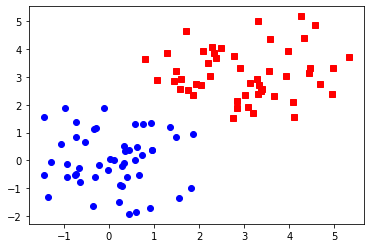

In [53]:
separable = np.loadtxt('separable.txt')
X = separable[:,:2]
t = separable[:,2]

plt.plot(X[t==-1,0], X[t==-1,1], 'bo')
plt.plot(X[t==1,0], X[t==1,1], 'rs')

### Defining lmc(X, t, Xtest)

In [ ]:
def lmc(X, t, Xtest):
    #Run lmc(X, t) (fit classifer to (X,t))
    #Find classification and score when applied to Xtest
    

What happens if the data are not separable?  Try it.

<div style="text-align: right"><b>[5 marks]</b></div>

# Part 4. Soft, large margin classifier

Of course, most interesting data sets are not linearly separable.  Using your `lmc` function as a basis, write a new function:

    sv, score = lsvm(X, t, C, Xtest)

that implements a soft large margin classifier. The additional parameter `C` should specify the relative weight given to the emperical error versus the regularisation term.
<div style="text-align: right"><b>[10 marks]</b></div>

Test your function on the following simple data set.   These data are drawn from two isotropic Gaussian distributions centred at $(0, 0)$ and $(2, 2)$, so the optimal separating hyperplane, in the limit of a large amount of data, is the perpendicular bisector of the line joining the centres.  As before, plot the separating hyperplane and the support vectors and make a contour plot of the score across the domain.
<div style="text-align: right"><b>[5 marks]</b></div>

How does the width of the margin vary with `C`?  Explain why.
<div style="text-align: right"><b>[5 marks]</b></div>

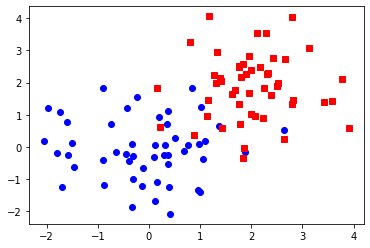

In [54]:
nonseparable = np.loadtxt('nonseparable.txt')
X = nonseparable[:,:2]
t = nonseparable[:,2]

plt.plot(X[t==-1,0], X[t==-1,1], 'bo')
plt.plot(X[t==1,0], X[t==1,1], 'rs')

# Part 5. Nonlinear SVM

Finally, using your `lsvm` code as a basis, write a new function to implement a fully nonlinear SVM with a user-specfied kernel function.   Your code should have the signature:

    sv, score = svm(X, t, C, kernel, Xtest)
    
where the `X`, `t`, `C` and `Xtest` are as before and `kernel` is a function that evaluates a kernel and can be called by your svm to evaluate the similarity of any pair of vectors:

    ip = kernel(x, y)     # inner product in some high-dimensional space

For example, the following cell implements an RBF kernel function

<div style="text-align: right"><b>[10 marks]</b></div>

In [55]:
def rbf(x, y, gamma=1):
    """RBF kernel with precision gamma."""
    d = x-y
    return exp(-gamma*dot(d, d))

Test your code on the non-separable data above using a linear kernel, the RBF kernel and the polynomial kernel.  You will need to use cross-validation to choose the best parameters and it is fine to use the `scikit` cross validation and grid search machinery rather than writing your own.

<div style="text-align: right"><b>[5 marks]</b></div>

## Regularisation

Using the non-separable data, plot the regularisation term $\|\mathbf{w}\|^2$ (you may need to modify your function above to return the $\alpha$ values) and the empirical error for a range of $C$ and so visualise the trade-off between regularisation and empirical error. Use an appropriate logarithmically spaced range for $C$.

<div style="text-align: right"><b>[10 marks]</b></div>